In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv("student_data.csv")

In [60]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [61]:
df.shape

(395, 33)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

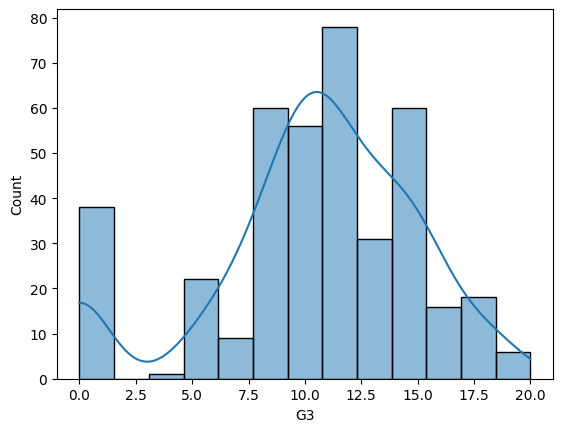

In [63]:
sns.histplot(df['G3'], kde=True)
plt.show()

In [ ]:
sns.pairplot(df.select_dtypes(include="number"))
plt.show()

In [ ]:
sns.scatterplot(x=df['school'], y=df['famsize'], hue=df['G3'])
plt.show()

In [ ]:
df['famsize'].unique()

In [ ]:
for col in df.columns:
    print(df[col].value_counts())

In [ ]:
(df['romantic']).value_counts()

In [ ]:
X = df.drop('G3', axis=1)
y = df['G3']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
one_hot_encoder = OneHotEncoder(feature_name_combiner="concat")

In [ ]:
scaler = StandardScaler()

In [ ]:
one_hot_columns = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup", "famsup", "paid", "activities",
                   "nursery", "higher", "internet", "romantic"]

In [ ]:
standard_scaler_columns = ["age", "Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout",
                           "Dalc", "Walc", "health", "absences", "G1", "G2"]

In [ ]:
preprocessor = ColumnTransformer(transformers= [
    ("ohe", one_hot_encoder, one_hot_columns), ("scaled", scaler, standard_scaler_columns)
], remainder = "drop")

In [ ]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [ ]:
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=preprocessor.get_feature_names_out())

In [ ]:
X_train_transformed_df.head()

## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_regressor = DecisionTreeRegressor()

In [ ]:
dt_regressor.fit(X_train_transformed, y_train)

In [ ]:
y_pred = dt_regressor.predict(X_test_transformed)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
print("Mean Absolute Error :", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error :", mean_squared_error(y_test, y_pred))
print("r2 Score :", r2_score(y_test, y_pred))

Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    "criterion" : ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "splitter" : ["best", "random"],
    "max_depth" : [1, 2, 3, 4, 5, 10, 15, None],
    "max_features" : ["sqrt", "log2", None]
}

In [ ]:
grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=params, scoring="r2", cv=5)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
grid.fit(X_train_transformed, y_train)

In [ ]:
grid.best_score_

In [ ]:
y_pred = grid.predict(X_test_transformed)

In [ ]:
print("Mean Absolute Error :", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error :", mean_squared_error(y_test, y_pred))
print("r2 Score :", r2_score(y_test, y_pred))

In [ ]:
best_tree_model = DecisionTreeRegressor(criterion="friedman_mse", max_depth=4)
best_tree_model.fit(X_train_transformed, y_train)

In [ ]:
y_pred = best_tree_model.predict(X_test_transformed)

In [ ]:
print("Mean Absolute Error :", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error :", mean_squared_error(y_test, y_pred))
print("r2 Score :", r2_score(y_test, y_pred))

In [ ]:
plt.scatter(y_test, y_pred)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

df_columns = one_hot_columns + standard_scaler_columns

tree.plot_tree(best_tree_model.fit(X_train_transformed, y_train), feature_names = preprocessor.get_feature_names_out())

##Diğer Regresyon çeşitlerini deneyelim

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train_transformed, y_train)
y_pred = linreg.predict(X_test_transformed)
print("Mean Absolute Error :", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error :", mean_squared_error(y_test, y_pred))
print("r2 Score :", r2_score(y_test, y_pred))

In [ ]:
plt.scatter(y_test, y_pred)
plt.show()

Lasso

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_transformed, y_train)
y_pred = lasso.predict(X_test_transformed)
print("Mean Absolute Error :", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error :", mean_squared_error(y_test, y_pred))
print("r2 Score :", r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.show()

Ridge

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_transformed, y_train)
y_pred = ridge.predict(X_test_transformed)
print("Mean Absolute Error :", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error :", mean_squared_error(y_test, y_pred))
print("r2 Score :", r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.show()

Support Vector Regressor

In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train_transformed, y_train)
y_pred = svr.predict(X_test_transformed)
print("Mean Absolute Error :", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error :", mean_squared_error(y_test, y_pred))
print("r2 Score :", r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.show()

In [ ]:
from sklearn.svm import SVR

params = {
    "kernel" : ["linear", "poly", "rbf", "sigmoid"],
    "gamma" : ["scale", "auto"],
    "C" : [0.01, 0.1, 1, 10, 100],
}

grid = GridSearchCV(estimator=SVR(), param_grid=params, scoring="r2", cv=5)

import warnings
warnings.filterwarnings("ignore")
grid.fit(X_train_transformed, y_train)

In [ ]:
y_pred = grid.predict(X_test_transformed)
print("Mean Absolute Error :", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error :", mean_squared_error(y_test, y_pred))
print("r2 Score :", r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.show()

KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

params = {
    "n_neighbors" : [1, 2, 3, 4, 5, 15],
    "weights" : ["uniform", "distance", None],
    "algorithm" : ["auto", "ball_tree", "kd_tree"],
}

grid = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=params, scoring="r2", cv=5)

import warnings
warnings.filterwarnings("ignore")
grid.fit(X_train_transformed, y_train)

In [ ]:
y_pred = grid.predict(X_test_transformed)
print("Mean Absolute Error :", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error :", mean_squared_error(y_test, y_pred))
print("r2 Score :", r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.show()